In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

from multisense_translate import MultiSenseLinearTranslator


Populating the interactive namespace from numpy and matplotlib


In [2]:
sims = MultiSenseLinearTranslator(restrict_vocab=2**14).main()

2017-06-26 16:25:02,951 utils (267) INFO loading KeyedVectors object from /mnt/permanent/Language/English/Embed/glove.840B.300d.gensim
2017-06-26 16:25:07,403 utils (294) INFO loading syn0 from /mnt/permanent/Language/English/Embed/glove.840B.300d.gensim.syn0.npy with mmap=None
2017-06-26 16:25:07,980 utils (326) INFO setting ignored attribute syn0norm to None
2017-06-26 16:25:07,983 utils (273) INFO loaded /mnt/permanent/Language/English/Embed/glove.840B.300d.gensim
2017-06-26 16:25:08,041 multisense_translate (68) INFO Trained on 5000 words
2017-06-26 16:25:08,386 multisense_translate (198) INFO Testing...
2017-06-26 16:25:08,424 multisense_translate (144) INFO Reading source mx from /mnt/permanent/Language/Hungarian/Embed/multiprot/adagram/mnsz/adagram-mnsz-600d-a.05-5p-m100_sense.mse...
2017-06-26 16:25:16,820 multisense_translate (154) INFO Source vocab and mx read (16384, 600)
2017-06-26 16:25:25,227 multisense_translate (158) INFO Populating reverse neighbor rank mx...
2017-06-2

2017-06-26 16:26:24,298 multisense_translate (129) DEBUG 0.28793587210575344 helyettes [['assistant'], ['substitute']]  58
2017-06-26 16:26:25,124 multisense_translate (129) DEBUG 0.1716520987155219 drága [['expensive'], ['dear'], ['precious']]  59
2017-06-26 16:26:25,334 multisense_translate (129) DEBUG 0.45448188211358437 lényeg [['substance'], ['essence']]  60
2017-06-26 16:26:25,388 multisense_translate (129) DEBUG 0.17916223921198532 erő [['muscle'], ['steam']]  61
2017-06-26 16:26:26,384 multisense_translate (129) DEBUG 0.18729247249189807 induló [['candidate'], ['march']]  62
2017-06-26 16:26:28,392 multisense_translate (129) DEBUG 0.20467242811111952 ülés [['sitting'], ['assembly']]  63
2017-06-26 16:26:28,887 multisense_translate (129) DEBUG 1.0 szabadság [['liberty', 'independence'], ['liberty'], ['independence']]  64
2017-06-26 16:26:28,944 multisense_translate (129) DEBUG 1.0000000000000002 nyilvánvaló [['obvious', 'apparent'], ['obvious'], ['plain'], ['evident'], ['apparen

52.5%


(array([ 10.,  10.,  14.,  18.,   6.,   4.,   4.,   2.,  25.]),
 array([ 0.16031416,  0.25361258,  0.34691101,  0.44020944,  0.53350786,
         0.62680629,  0.72010472,  0.81340315,  0.90670157,  1.        ]),
 <a list of 9 Patch objects>)

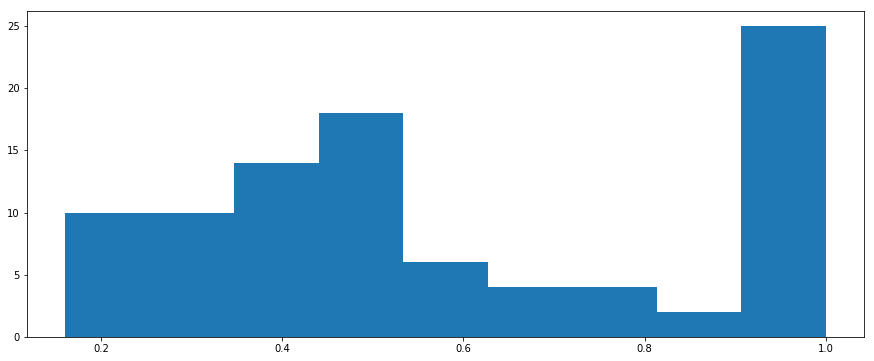

In [13]:
plt.hist(sims, bins=9)